#### Projektna naloga za OVS


Šolsko leto 2019/20

```
Ime in priimek: Matic Knez
Vpisna številka: 63180152
Podatkovni niz: klek.csv
```

#### Izjava o avtorstvu


Izjavljam, da sem nalogo samostojno izdelal.

# Opis podatkov in raziskovalne domneve

Meritve premera in višine na vzorcu 50 orjaških klekov (lat. Thuja plicata).

Baza podatkov s 50 meritvami dveh spremenljivk


  - premer je numerična zvezna spremenljivka, ki predstavlja premer debla, merjen na višini 1.37 m nad tlemi (v metrih).
  - visina je numerična zvezna spremenljivka, ki predstavlja višino drevesa (v metrih).

Raziskovalna domneva:
 - Med višino in premerom orjaških klekov obstaja funkcijska zveza.
 
Transformacija 
- Konstruirati linearni regresijski model med spremenljivkama visina in log2(premer).
- V nadaljevanju bomo videli, zakaj je bila transformacija X potreba.

## Uvoz podatkov in transformacija
Podatke klek.cvs uvozimo v python s knjiznico pandas, z metodo pandas.read_csv(path).

Podatke imamo v formatu DataFrame - v stolpcih

Naredili smo tudi transofrmacijo spremenljivke X v log2(X) z metodo .log2, knljiznjice numpy, ki logaritmira vse podatke v podanem stolpcu.
- xlog (transofrmirani podatki spremenljivke X - log2(premer))
- x (podatki spremenljivka X)
- y (podatki spremenljivke Y)


In [9]:
import pandas
import numpy as np

path = "D:\OneDrive - Univerza v Ljubljani\FRI\OVS\Projektna_naloga\projekt\podatki\klek.csv"

data = pandas.read_csv(path)


data['premerlog'] = np.log2(data['premer']) 

xlog = data['premerlog'] #transofrmirana spremenljivka X log2(premer)
x = data["premer"] #spremenljivka X
y = data["visina"] #Spremenljivka Y

# Opisna statistika
Za prikaz opisne statistike uporabimo metodo .describe() nad podatki

Metoda .describe() nam:
- count - stevilo vseh podatkov (meritev)
- mean - povprecje
- std - standradni odklon
- min - minimum (minimalna vrednost)
- 25% - prvi kvantil 
- 50% - drugi kvantil
- 75% - tretji kvantil 
- max - maximum (maksimalna vrednost)
- Name - dobimo ime stolpca in tip podatkov


In [10]:
data.describe()

,premer,visina,premerlog
count,50.000000,50.000000,50.000000
mean,4.183000,24.636000,1.878567
std,2.143167,6.622342,0.758802
min,1.110000,9.500000,0.150560
25%,2.802500,21.250000,1.484907
50%,3.815000,25.000000,1.931622
75%,4.945000,28.875000,2.305915
max,10.150000,39.000000,3.343408


Opazili smo da je povprecen premer drevesa 4.18m, najmanjsi premer 1.1m najvcji pa 10.1m. Povpreca visina dreves s podatkov je 24.6, najmanjsa znasa 9.5m najvecja pa 39m. Pri transofrmirani spremenljivki log2(premer) opazimo da je povprecena vrednost 1.87m.

# Razveseni diagram - Scatter plot
- Razveseni diagram nam pomaga pri graficni predstavi zveze med padatki
- Zgradili ga bomo s pomocjo knjiznjice pyplot z metodo plot
- Primerjali bomo graf v zvezi med premerom & visino in log2(premer) & visina
- 2 Grafa izrisemo z metodo .subplots, podamo ji 2 osi (2 grafa) in velikost 
- metodi plot podamo x in y os, znak 'o' za prikaz podatkov na diagramu in barvo
- oznako x in y osi smo dolocilo z metodo set_ylabel in set_xlabel
- naslov diagrama pa smo dolocilo z metodo set_title


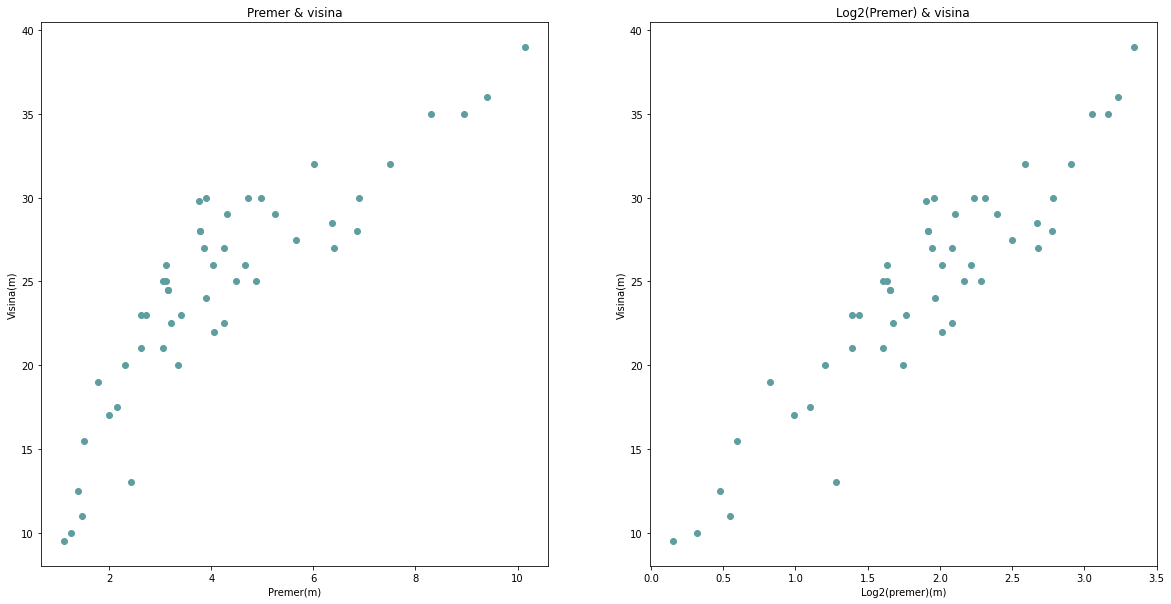

In [25]:
import matplotlib.pyplot as plt
#dolocimo x in y podatke
# x - premer
# y - visina
x = data["premer"]
y = data["visina"]
xlog = data['premerlog']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(x, y, 'o', color ='cadetblue')
ax2.plot(xlog, y, 'o', color ='cadetblue')

ax1.set_title("Premer & visina")
ax1.set_xlabel("Premer(m)")
ax1.set_ylabel("Visina(m)")

ax2.set_title("Log2(Premer) & visina")
ax2.set_xlabel("Log2(premer)(m)")
ax2.set_ylabel("Visina(m)")
plt.show()

Na levi strani smo prikazali tocke v zvezi s premerom in visino (pred transformacijo), na desni strani pa tocke med Log2(premer) in visino po (transformaciji). Opazimo, da so tocke na desni strani nekoliko lepse nahajajo okoli namisljene premice. Zakljucimo, da je transofrmirana spremenljivka je bolj primerna za linearni model.

## Koeficient korelacije
Ko opazujemo razveseni diagram, vidimo da je nekaksna zveza med spremenljivkami - (korelacija). S povecevanjem premera drevesa se povecuje tudi visina. 
Moc zveze (korelacije) med spremenljivkama dobimo iz korelacijskega koeficienta. 
- Predvidevamo, da bo koeficient pozitivn, ker se s povecevanjem premera povecuje tudi visina drevesa
- Predvidevamo, da bo koeficinet dokaj visok, ker tocke grafa niso prevec razprsene in so v obliki namisljene premice 

Korelacijski koeficient izracunamo iz podatkov z metodo .corr()

In [12]:
print(data.corr())

             premer    visina  premerlog
premer     1.000000  0.865035   0.949668
visina     0.865035  1.000000   0.924249
premerlog  0.949668  0.924249   1.000000


Koeficient korelacije med visino in premerom (r = 0.865) - pred transformacijo

Koeficient korelacije med visino in log2(premer) (r = 0.924) - po transformacijo

Iz tega razberemo, da je koeficient korelacije med visino in premerom 0.865, med visino in log2(premer) pa 0.924.

Ugotovili smo:
- koeficient je pozitiven, kar pomeni da z narascanjem premera narasca tudi visina in obratno
- koeficient je visok, kar pomeni da je visoka povezanost med visino in premerom 
- koeficinet korelacije po transformaciji je vecji od koeficienta pred transformacijo, kar pomeni da je transformirana spremenljivka primernejsa za regresijski model


# Formiranje linearnega regresijskega modela
- Lienarni regresijski model bomo izdelali z metodo LinearRegresion(), iz knjiznjice sklearn
- Najprej izdelamo regresijski model (LinearRegression())
- Podatke uvozimo v model z metodo .fit, ki sprejme 2-dimenzionalno tabelo X vrednosti in tabelo y vrednosti
- Podatke X oblikujemo v 2D z metodo .values.reshape(-1, 1)




In [13]:
from sklearn.linear_model import LinearRegression

x = data["premer"]
y = data["visina"]
xlog = data['premerlog']

#spremenimo v 2-dimenzionalno tabelo, ki jo zahteva metoda .fit
x2D = x.values.reshape(-1, 1)
xlog2D = xlog.values.reshape(-1, 1)
#x1 = x.to_numpy().reshape(-1, 1)

regresion_model1 = LinearRegression()
regresion_model2 = LinearRegression()
#Izdelava linearnega regresijskega modela s funkcijo LinearRegression(), knjiznjice sklearn
reg1 = regresion_model1.fit(x2D, y) #regresijski model pred transofrmacijo spremenljivke 
reg2 = regresion_model2.fit(xlog2D, y) #regresijski model po transofrmaciji spremenljivke 


Izdelali smo 2 regresijskega modela
- reg1 - regresijski model pred transofrmacijo spremenljivke 
- reg2 - regresijski model po transofrmaciji spremenljivke

## Ocena premice 

y = kx + n 

- k - naklon (.coef_)
- n - odsek (.intercept_)

In [384]:
odsek = reg2.intercept_
naklon = reg2.coef_[0]

print("Naklon: {:.3}".format(odsek))
print("Odsek: {:.3}".format(naklon))
print("Dobimo premico: y = {:.2}x + {:.2}".format(odsek, naklon))

Naklon: 9.48
Odsek: 8.07
Dobimo premico: y = 9.5x + 8.1


## Predikcija ze vrednost Y pri izbrani vrednosti X



In [33]:
import math
prediction = reg2.predict([[math.log2(3)]])
predicted_value = prediction[0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 22.27


Ustavrili smo predikcijo za visino drevesa pri premeru debla 3m -> log2(3).

Izhodna vrednost je 33.68, kar pomeni da naj bi bilo drevo visoko 33.68m pri premeru debla 3m.

## Preverjanje predpostavk linearnega regresijskega modela
Pravilnost linearnega regresijskega modela bomo preveli s 4 grafi. V primeru, da so vse predpostavke izpolnjene, pomeni da je linearni regresijski model pravilen in iz njega dobimo dobre predikcije za vrednosti Y (visine drevesa). 

Preverjali bomo:
- linearnost 
- normalnost 
- homogenost variance 
- vpliva posameznih tock na model


Za preverjanje predpostavk modela najprej ustvarimo tabelo predikcije (predvidene vrednosti modela)

### Priprava podatkov
- tabelo x vrednosti spremenimo v 2-dimenzionalno tabelo
- ustavrimo predikcije y vrednosti (y_predictions), s pomocjo regresijskega modela
- predikcije dobimo iz regresijskega modela z metodo .predict(x vrednosti)
- ustavrimo frame podatkov, ki vsebuje dejanske vrednosti (Actual), predvidenih vrednosti (Predicted) in ostanki med njima (Residuals)


In [14]:
import seaborn as sns

y_predictions_reg1 = reg1.predict(x2D) #predikcije za Y vrednosti na podlagi regresijskega modela 1 - pred transformacijo 
y_predictions_reg2 = reg2.predict(xlog2D) #predikcije za Y vrednosti na podlagi regresijskega modela 2 - po transformaciji

#Actual - podane vrednosti y (klek.csv)
#Predicted - "predvidenih" vrednosti y, na podlagi linearnega regresijskega modela
#Residuals - ostanki med razliko dejanskih vrednosti in napovedanih vrednosti 
df_results1 = pandas.DataFrame({'Actual': y, 'Predicted': y_predictions_reg1})
df_results2 = pandas.DataFrame({'Actual': y, 'Predicted': y_predictions_reg2})

df_results1['Residuals'] = abs(df_results1['Actual']) - abs(df_results1['Predicted'])
df_results2['Residuals'] = abs(df_results2['Actual']) - abs(df_results2['Predicted'])

#podatki vrednoti, y, predikcij in ostankov pred transformacijo X
dejanske_vrednosti_y1 = df_results1['Actual']
predvidene_vrednosti_y1 = df_results1['Predicted']
ostanki1 = df_results1['Residuals']

#podatki vrednoti, y, predikcij in ostankov po transformacijo X
dejanske_vrednosti_y2 = df_results2['Actual']
predvidene_vrednosti_y2 = df_results2['Predicted']
ostanki2 = df_results2['Residuals']

### Linearnost modela


Linearnost regresijskega modela preverimo tudi tako, da narisemo graf ostankov med dejanskimi y vrednosti in predvidenimi y vrednosti in pogledamo ali obstaja kaksen vzorec. Za linearnost modela ne sme biti vzorca, tocke pa morajo biti enakomerno razporejene nad in pod premico ostankov y=0. 

Graf izdelamo s pomocjo knjiznjice seaborn, z metodo .regplot.
- x-os (predvidenih vrednosti) 
- y-os (ostanki med dejanskimi in predvidenimi vrednosti)
- lowess=True - funkcija glajenja
- barva premice

Text(0, 0.5, 'Ostanki')

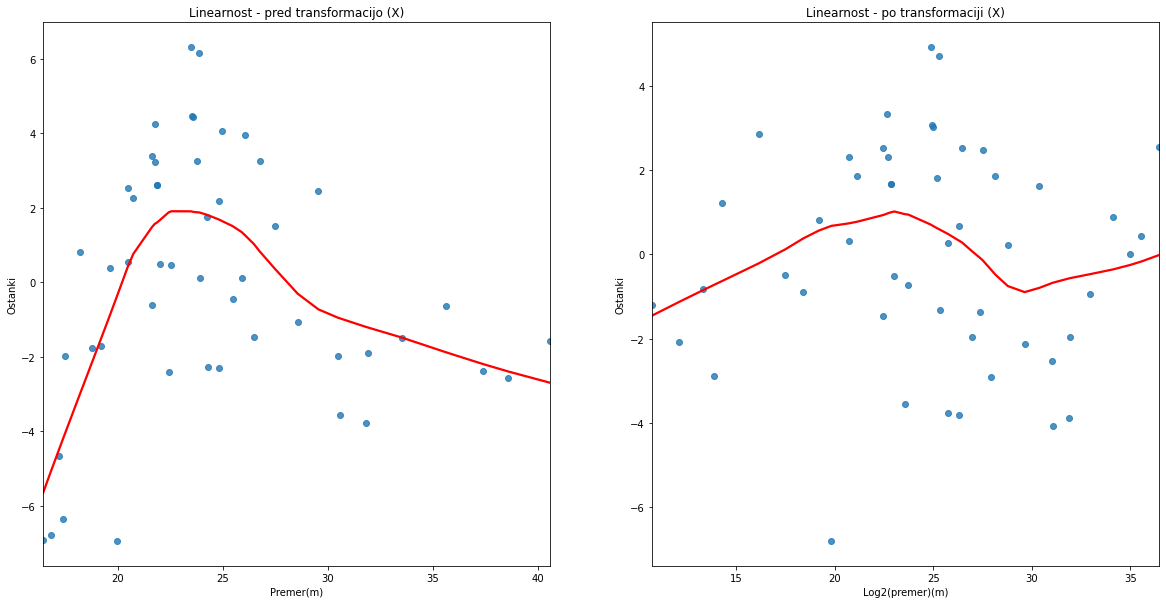

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.regplot(x=predvidene_vrednosti_y1, y=ostanki1, lowess=True, line_kws={'color': 'red'}, ax=ax1)
sns.regplot(x=predvidene_vrednosti_y2, y=ostanki2, lowess=True, line_kws={'color': 'red'}, ax=ax2)

ax1.set_title("Linearnost - pred transformacijo (X)")
ax1.set_xlabel("Premer(m)")
ax1.set_ylabel("Ostanki")

ax2.set_title("Linearnost - po transformaciji (X)")
ax2.set_xlabel("Log2(premer)(m)")
ax2.set_ylabel("Ostanki")

Opazili smo, da graf (Linearnost - pred transofrmacijo) prikazuje nekaksen vzorca, ta oblika nam daje informacijo o funkciji x, ki manjka v modelu. Ta funkcija je log2. V 2. grafu (Linearnost - po transofrmaciji) opazimo, da so tocke enakomerno razporejene nad in pod premico ostankov, iz tega lahko potrdimo, da je linearni regresijski model pravilen.

### Normalnost porazdelitve 

Normalnost porazdelitve nakljucnih napak preverjamo z grafom porazdelitve standardiziranih
ostankov. Ostanek se standardizira tako, da se deli z oceno njegovega standardnega odklona. Grafu krajse pravimo tudi Q-Q graf normalne porazdelitve. Na x-osi imamo teoreticni kvantil, na y-osi pa standardiziran ostanek. 

- Za izris qq - grafa bomo uporabili .qqplot metodo, knjiznjice statsmodel.
- S funkcijo .sublplots ustvarimo 2 grafa (prikaz pred in po transofrmaciji X).
- Funkciji .qqplot podamo predvidene vrednoti y regresijskega modela, fit=True - podatki razporejeni v grafu, line='45' - premica pod kotom 45s 

Text(0, 0.5, 'Stand. ostanki')

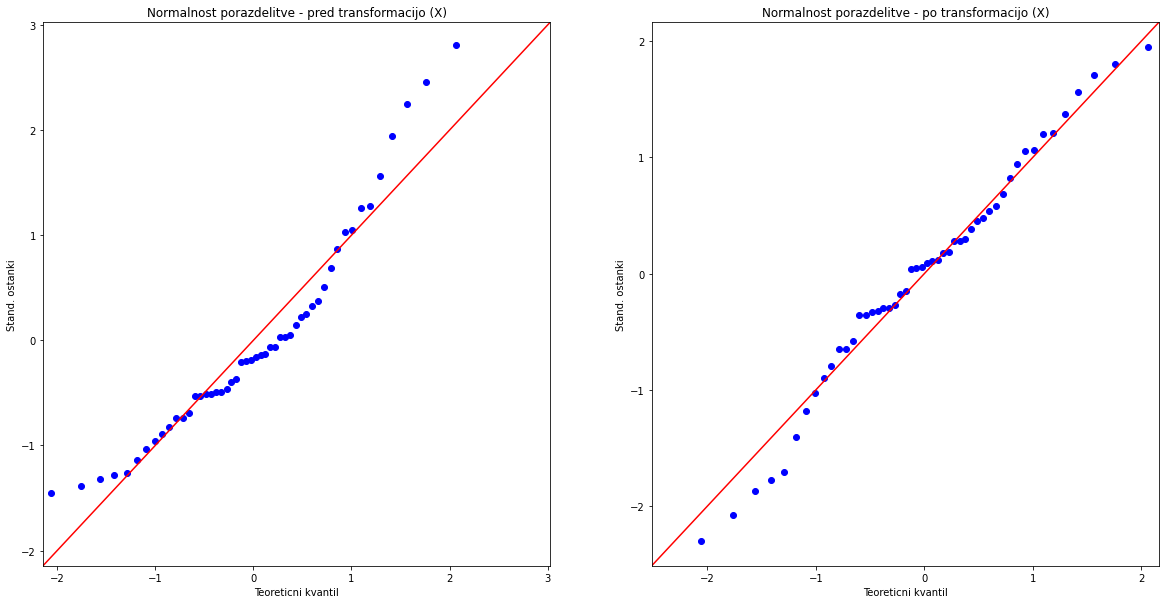

In [34]:
import statsmodels.api as sm
x = data["premer"]
xlog = data["premerlog"]
y = data["visina"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sm.qqplot(predvidene_vrednosti_y1, fit=True, line='45', ax=ax1)
sm.qqplot(predvidene_vrednosti_y2, fit=True, line='45', ax=ax2)

ax1.set_title("Normalnost porazdelitve - pred transformacijo (X)")
ax1.set_xlabel("Teoreticni kvantil")
ax1.set_ylabel("Stand. ostanki")

ax2.set_title("Normalnost porazdelitve - po transformacijo (X)")
ax2.set_xlabel("Teoreticni kvantil")
ax2.set_ylabel("Stand. ostanki")

Opazili smo, da tocke na grafu v obeh primerih tvorijo premico (z manjsimi odstopanji), ugotovimo, da je porazdelitev nakljucnih
napak normalna. Na 2. grafu (normalnost porazdelitve po transofrmaciji) opazimo, da je odstopanje tock nekoliko manjse kot pri 1. grafu, ugotovimo, da je regresijski model primernejsi s podatki transformirane spremenljivke.

### Homogenost variance

Homogenost variance - pomeni, da imajo nakljucne napake linearnega regresijskega modela enako konstanto varianco.
Graf za prikaz nekonstantne variance je graf korena standardiziranih ostankov v odvisnosti od x in od predvidenih vrednosti
Pri narascanju variance je graf pogosto oblike C, pri padanju variance pa oblike B. 
Pri ocenjevanju si bomo pomagali s funkcijo glajenja, v primeru konstantne variance se pricakuje horizontalna crta, okoli katere so
tocke enakomerno razporejene.

Graf bomo izrisali z metodo .regplot

Parametri:
- x-os predvidene vrednosti y
- y-os koren standardiziranih ostankom med predvidenimi vrednosti y in dejanskimi vrednosti y 
- os grafa (2 osi - 2 grafa)
- funkcijo glajenja (lowess=True)
- izris premice v rdeci barvi 

Text(0, 0.5, 'sqrt(Stand. ostanki)')

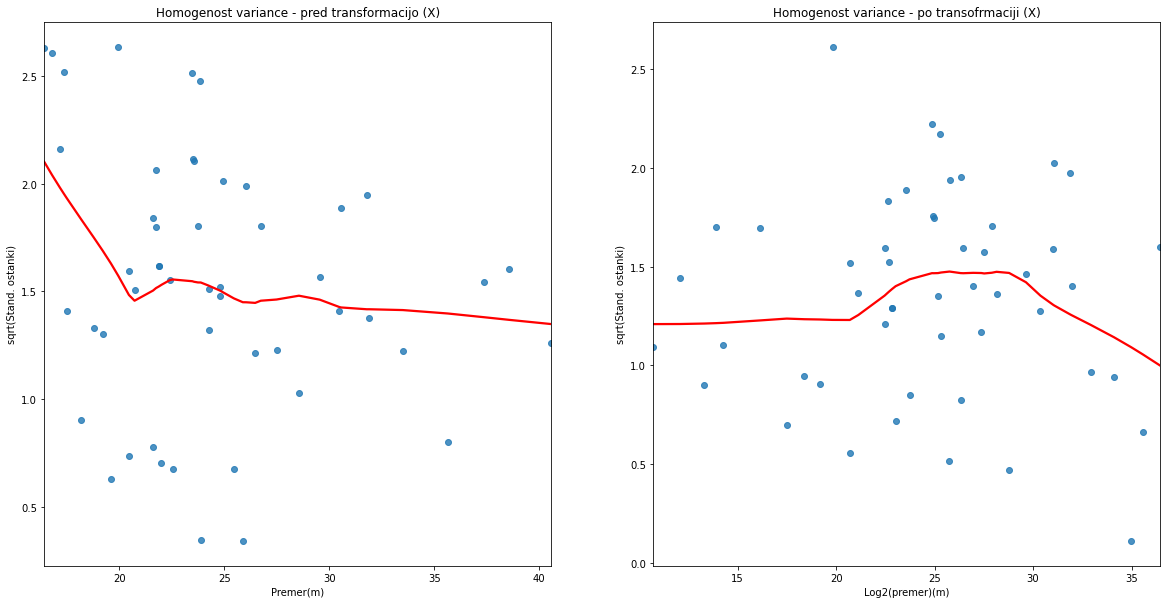

In [28]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.regplot(x=predvidene_vrednosti_y1, y=np.sqrt(np.abs(ostanki1)), ax=ax1, lowess=True, line_kws={'color': 'red'})
sns.regplot(x=predvidene_vrednosti_y2, y=np.sqrt(np.abs(ostanki2)), ax=ax2, lowess=True, line_kws={'color': 'red'})

ax1.set_title("Homogenost variance - pred transformacijo (X)")
ax1.set_xlabel("Premer(m)")
ax1.set_ylabel("sqrt(Stand. ostanki)")

ax2.set_title("Homogenost variance - po transofrmaciji (X)")
ax2.set_xlabel("Log2(premer)(m)")
ax2.set_ylabel("sqrt(Stand. ostanki)")

Opazili smo, da varianca na 1. grafu strmo pada, nato pa je naprej konstanta. Na 2. grafu pa opazimo dokaj konstantno varianco preko celotnega gafa, ni narascanja in padanja. 

### Vpliv tock na model
Za predstavitev tock in cookove razdalje smo uporabili program R. Ce i-ta tocka ne vpliva mocno na model, bo vrednost Di majhna.Ce je Di > 4/n−2, kjer je n velikost vzorca, i-ta tocka vpliva na linearni regresijski model, v nasprotnem primeru ne.

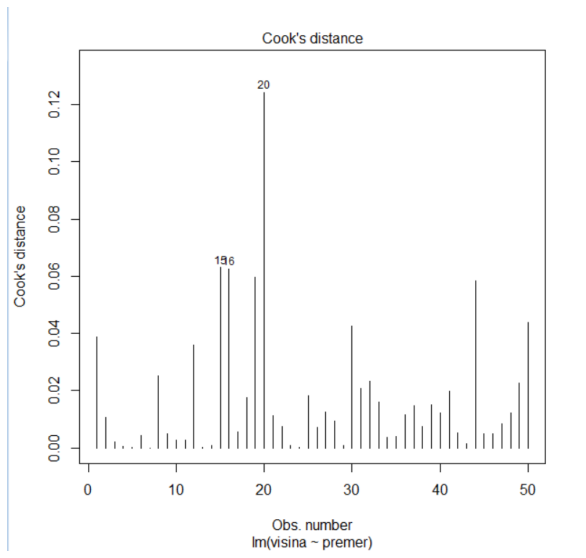

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20,10))
plt.axis('off')
img=mpimg.imread('C:\\Users\\Matic\\Desktop\\cook.png')
imgplot = plt.imshow(img)

Opazimo, da najvec odstopajo tocka (15, 16 , 20). Od tega, odstopajo tocka 15 in 16 zelo malo, kar pomeni da verjetno ne vplivajo na regresijski model. Tocka 20 odstopa malo vec, zato predvidevamo da bi lahko vplivala na model. Da se prepricamo, izracunamo katera Cookova razdalja tock presega 4/n-2. To naredimo z metodo v R-ju, cooks.distance, ki nam vrne razdalje tock regresijskega modela, nato pa jih primerjamo z vrednsotjo 4/n-2.

```which(cooks.distance(model2)>4/48)```

```20```

Dobili smo tocko (20), ki presega Cookovo razdaljo. Preverimo se ali je njen vpliv na model velik tako, da preverimo ali je Cookova razdalja vecja ali enaka mediani Fisherjeve porazdelitve. To preverimo z metodo .cooksdistance v R-ju, kjer primerjamo cookovo razdaljo tock modela z mediano fisherjeve porazdelitve.

```any(cooks.distance(model2)[c(20)]>=qf(0.5,2,50))```

```[1] False```

Ugotovilo smo, da tocka (20) nima velikega vpliva na regresijski model, zato je ni potrebno odstraniti.

### Primerjava napovedanih in dejanskih vrednosti y 

Za paravilnost regresijskega modela lahko izrisemo graf, kjer primerjamo napovedane vrednosti regresijskega modela in dejanske vrednosti y. Ker so vse vrednoti na istem intervalu, bi morale vrednosti ustavriti obliko linearne premice. Da je regresijski model pravilen morajo tocke imeti obliko linearne premice, v nasprotne primeru pa krivuljo.

Text(0, 0.5, 'Predvidene vrednosti y')

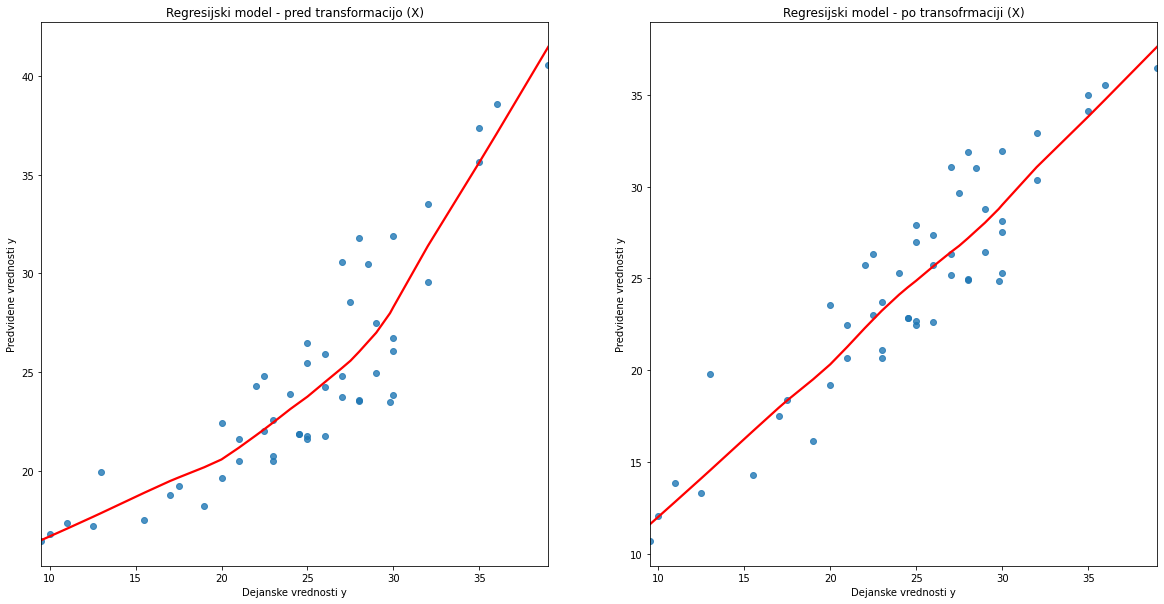

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.regplot(x=dejanske_vrednosti_y1, y=predvidene_vrednosti_y1, lowess=True, ax=ax1, line_kws={'color': 'red'})
sns.regplot(x=dejanske_vrednosti_y1, y=predvidene_vrednosti_y2, lowess=True, ax=ax2, line_kws={'color': 'red'})

ax1.set_title("Regresijski model - pred transformacijo (X)")
ax1.set_xlabel("Dejanske vrednosti y")
ax1.set_ylabel("Predvidene vrednosti y")

ax2.set_title("Regresijski model - po transofrmaciji (X)")
ax2.set_xlabel("Dejanske vrednosti y")
ax2.set_ylabel("Predvidene vrednosti y")


Opazili smo, da tocke 1. grafa ne predstavljajo linearne premice, ampak nekaksno krivuljo, kar pomeni da regresijski model 1 (pred transformacijo x) ni pravilen. Na 2. grafu smo opazili do tocke oblikujejo linearno obliko, kar pomeni da je regresijski model 2 (po transformaciji X) pravilen.

## Ugotovitve
Iz vseh predpostak smo ugotovili, da je linearni regresijski model 2. s transformacijo spremenljivke (X) pravilnejsi, od modela 1. brez transofrmirane spremenljivke. Ker je 2. model pravilnejsi, pomeni tudi da bojo njegove ocene za y vrednosti boljse od modela 1. 

# Testiranje linearnosti modela in koeficient determinacije
Regresijski model smo ponovno ustavrili s knjiznjico statsmodel zato, ker vsebuje veliko vec informacij o samem modelu.


Te informacije izpisemo s funkcijo .summary 

## Linearni regresijski model (pred transformacijo X)

In [20]:
from statsmodels.api import OLS

X2 = sm.add_constant(x)
model1 = sm.OLS(y, X2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 visina   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.51e-16
Time:                        21:05:57   Log-Likelihood:                -130.48
No. Observations:                  50   AIC:                             265.0
Df Residuals:                      48   BIC:                             268.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4551      1.050     12.820      0.000      11.345      15.565
premer         2.6729      0.224     11.945      0.000       2.223       3.123
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.969
Skew:                          -0.250   Prob(JB):                        0.616
Kurtosis:                       2.537   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Izracun standardnega odklona napak
# 1. Sestejemo vsoto kavadratnih ostankov
vsota_odstopanj1 = np.sum(ostanki1**2) 
# 2. Vsoto delimo s stevilom vseh meritev -2 in korenimo
stodklon1 = np.sqrt(1 / (len(y) - 2) * vsota_odstopanj1) #standardni odklon
print("S= {:.3}".format(stodklon1))

S= 3.36


Testna statistika za testiranje linearnosti modela je 142.7

Koeficient determinacije (R-squared) je enak 0.748. Pove nam kako dobro podatki ustrezajo modelu. V tem primeru nam pove da podatki v 75% ustrezajo modelu. 

## Linearni regresijski model (po transformaciji X)

In [22]:
X2log = sm.add_constant(xlog)
model2 = sm.OLS(y, X2log).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 visina   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     281.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.05e-21
Time:                        21:06:05   Log-Likelihood:                -116.82
No. Observations:                  50   AIC:                             237.6
Df Residuals:                      48   BIC:                             241.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4830      0.973      9.746      0.000       7.527      11.439
premerlog      8.0663      0.481     16.772      0.000       7.099       9.033
==============================================================================
Omnibus:                        0.979   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                1.006
Skew:                          -0.306   Prob(JB):                        0.605
Kurtosis:                       2.670   Cond. No.                         6.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Izracun standardnega odklona napak
# 1. Sestejemo vsoto kavadratnih ostankov
vsota_odstopanj2 = np.sum(ostanki2**2) 
# 2. Vsoto delimo s stevilom vseh meritev -2 in korenimo
stodklon2 = np.sqrt(1 / (len(y) - 2) * vsota_odstopanj2) #standardni odklon
print("S= {:.3}".format(stodklon2))

S= 2.55


Testna statistika za testiranje linearnosti modela je 281.3

Koeficient determinacije (R-squared) je enak 0.854. Pove nam kako dobro podatki ustrezajo modelu. V tem primeru nam pove da podatki v 85% ustrezajo modelu. 

Opazili smo da je koeficient determinacije modela po transformaciji spremenljivk vecji od modela pred transformacijo, kar pomeni da so podatki za model ustreznejsi po transformaciji.

# Intervala zaupanja za naklon in odsek regresijske premice
Interval zaupanja za neznani odklon in odsek regresijske premice izracunamo s funkcijo conf_int()
- conf_int(0.05) za 95%


In [24]:
model2.conf_int(0.05)

,0,1
const,7.526606,11.439401
premerlog,7.099266,9.033244


Interval zaupanja za odsek (Ia) je enak [7.5267, 11.4394] 

Interval zaupanja za naklon (Ib) je enak  [7.099, 9.033]

# Interval predikcije za vrednost Y pri izbrani vrednosti X

In [383]:
tab = [4, 8, 12]
for premer in tab:
    prediction2 = reg2.predict([[math.log2(premer)]])
    predicted_value2 = prediction2[0]
    print("Premer = {}m -> visina = {:.3}m".format(premer, predicted_value2))

Premer = 4m -> visina = 25.6m
Premer = 8m -> visina = 33.7m
Premer = 12m -> visina = 38.4m


V pythonu nisem nasel funkcije za izracun intervala predikcije, zato sem uporabil R.

```xpremer = data.frame(premer=c(log2(1),log2(2),log2(5)))```

```predict(model2, xpremer, interval="predict")```

```       fit      lwr      upr```

```1 25.61551 20.42680 30.80422```

```2 33.68177 28.38225 38.98128```

```3 38.40022 32.95673 43.84372```

#### Predvidena vrednost visine drevesa pri premeru:
- 4m je 25.6m, s 95% intervalom predikcije porabe goriva [20.43, 30.80],
- 8m je 33.7m, s 95% intervalom predikcije porabe goriva [28.38, 38.98],
- 12m je 38.4m, s 95% intervalom predikcije porabe goriva [32.96, 43.84]



# Zakljucek

Za izdelavo naloge v pythonu sem se odlocil, ker se malo zanimam za strojno ucenje in imam obcutek da se R uporablja bolj za kaksne analize podatkov. Za implementacijo vseh grafov sem uporabil vec razlicnih knjiznjic kot so pyplot, seaborn. Za implementacijo lienarne regresije sem uporabil sklearn v vecini za prikaz podatkov na grafu in knjiznico statsmodel, ki nam ponuja vec informacij o samem modelu. Za uvoz podatkov sem uporabil knjiznjico pandas v DataFrame formatu. Izdelovanje grafov in oblikovanje podatkov za regresijske modele ni bilo ravno preprosto, a sem se naucil veliko novih stvari glede regresijskega modela in oblikovanja podatkov v Pythonu. Za izracun nekaterih podatkov v pythonu nisem nasel altrnative R-ja, zato sem nekaj podatkov pridobil iz R-ja. Vse izracune in grafe sem preveril tudi z R-jem, da sem se preprical da podatki in grafi ustrezajo tem v Pythonu. Na koncu lahko potrdimo tudi raziskovalno domnevo, da med premerom in visino klekov obstaja funkcijska zveza.